In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Data Preprocessing

## Data obtaining

In [250]:
d0 = pd.read_csv('train.csv')

In [251]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
# DELETED BECAUSE SIZE
# data = pd.read_csv('mnist_train.csv')
# data = data.to_numpy()
# data = pd.DataFrame(data)

In [253]:
# Make sure both DataFrames have the same column names by creating a mapping
column_mapping = dict(zip(data.columns, d0.columns))

# DELETED BECAUSE SIZE
# data = data.rename(columns=column_mapping)

# Append rows from d0 to data
# d0 = d0.append(data, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11520\920448220.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d0 = d0.append(data, ignore_index=True)


In [256]:
d0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
l = d0.label

In [258]:
d = d0.drop('label', axis=1)

In [259]:
d.iloc[[100]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9


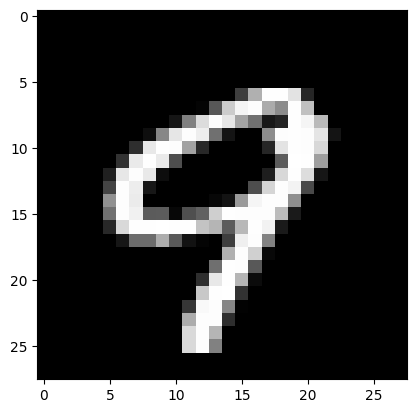

In [260]:
print(l.iloc[100])
idx = 100
grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray");

In [261]:
test_df = pd.read_csv("mnist_test.csv")
test_l_df = test_df.label

In [262]:
test_df = test_df.drop('label', axis=1)
test_df.columns = d.columns

## Data scaling

In [263]:
numeric_cols = d.select_dtypes(include=['float64','int']).columns.tolist()

In [264]:
scaler = MinMaxScaler()

In [265]:
scaler.fit(d[numeric_cols])

MinMaxScaler()

In [266]:
d[numeric_cols] = scaler.transform(d[numeric_cols])

## Data split

In [267]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    d[numeric_cols], l, test_size=0.25, random_state=42)

# Data processing

In [268]:
model = RandomForestClassifier(max_depth=20, n_estimators=300)
model.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [269]:
print(model.score(train_inputs, train_targets), model.score(test_inputs, test_targets))

0.9996296296296296 0.9948395061728396


In [270]:
print(model.score(test_df, test_l_df))

0.9783


In [271]:
test_l_df

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

## Test comprobation

3 [3]


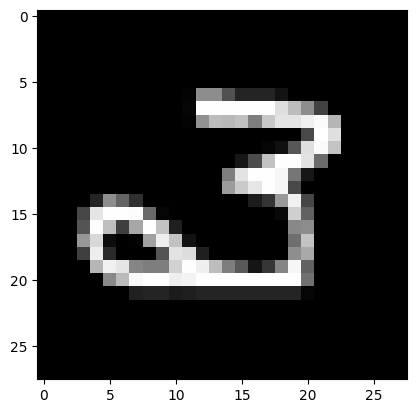

In [272]:
print(test_targets.iloc[120], model.predict(test_inputs.iloc[[120]]))
grid_data = test_inputs.iloc[120].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray");

4 [4]


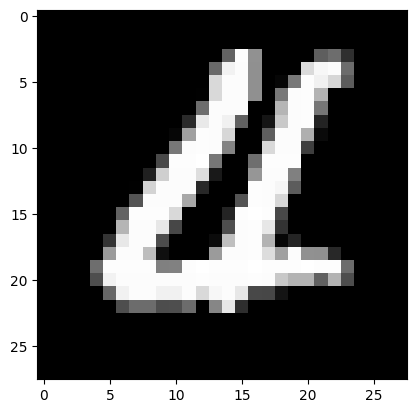

In [273]:
print(test_targets.iloc[10], model.predict(test_inputs.iloc[[10]]))
grid_data = test_inputs.iloc[10].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray");

[5]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


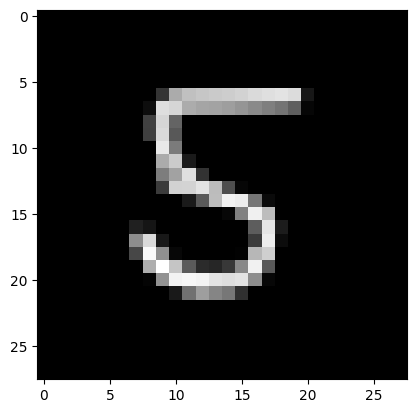

In [274]:
image = plt.imread('NMISTest/test.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

[8]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


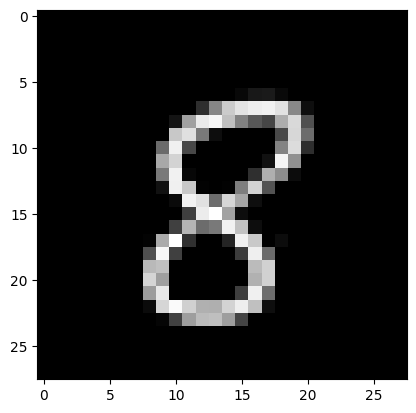

In [275]:
image = plt.imread('NMISTest/test2.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[4]


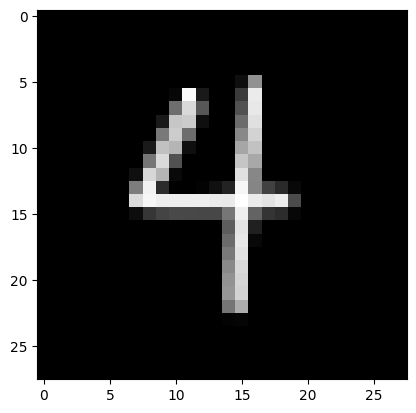

In [276]:
image = plt.imread('NMISTest/test3.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

[7]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


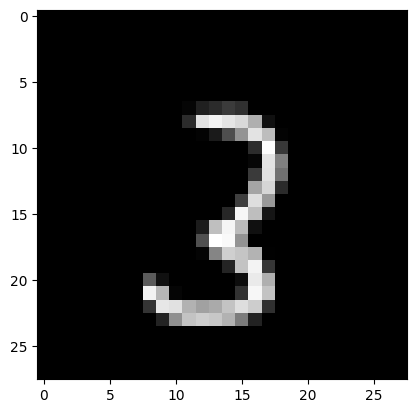

In [277]:
image = plt.imread('NMISTest/test4.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

[7]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


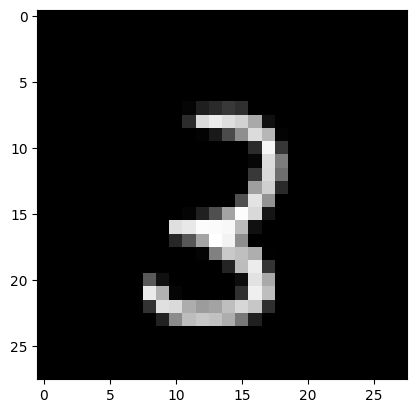

In [278]:
image = plt.imread('NMISTest/test5.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

[7]

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


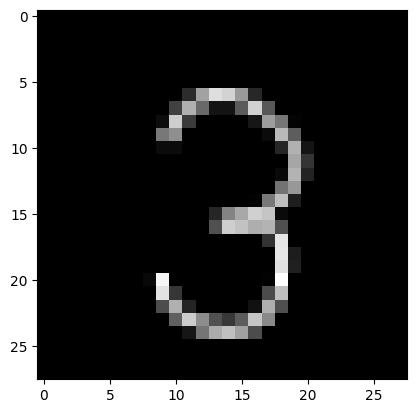

In [279]:
image = plt.imread('NMISTest/test6.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

[9]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


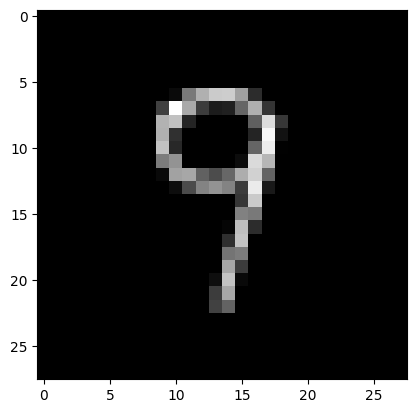

In [280]:
image = plt.imread('NMISTest/test7.png')
if image.shape[-1] == 3:
    image = np.mean(image, axis=2)
image_vector = image.reshape(1, -1)
print(model.predict(image_vector))
plt.imshow(image, cmap="gray");

0 [0]


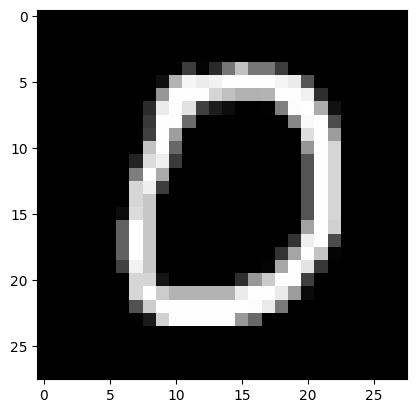

In [281]:
print(test_l_df.iloc[10], model.predict(test_df.iloc[[10]]))
grid_data = test_df.iloc[10].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray");

We see that our model is good but has some issues when working with the number 3!